In [1]:
import cv2
import glob
import numpy as np
import ellipseEdgeDetect as elps
import matplotlib.pyplot as plt

CANVAS_DIAMETER = 1000
STANDARD_SIZE = 10000
STANDARD_WIDTH = 350
STANDARD_HEIGHT = 75
STANDARD_VALUE = 150





def normalize_orientation(image, center_x, center_y, orientation, scale):
    canvas_radius = CANVAS_DIAMETER / 2
    translation = np.float32([[1, 0, canvas_radius-center_x], [0, 1, canvas_radius-center_y]])
    translated = cv2.warpAffine(image, translation, (CANVAS_DIAMETER, CANVAS_DIAMETER))
    rotation_matrix = cv2.getRotationMatrix2D((canvas_radius, canvas_radius), orientation-90, scale=scale)
    canvas_result = cv2.warpAffine(translated, rotation_matrix, (CANVAS_DIAMETER, CANVAS_DIAMETER))
    height_offset = int(STANDARD_HEIGHT/2)
    width_offset = int(STANDARD_WIDTH/2)
    cropped = canvas_result[canvas_radius-height_offset:canvas_radius+height_offset,
                            canvas_radius-width_offset:canvas_radius+width_offset]
    return cropped



97.33 97.33 97.33 1.18057982184


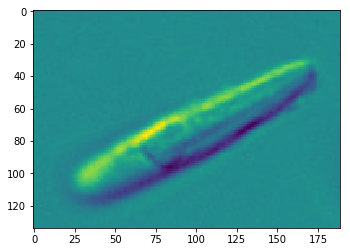

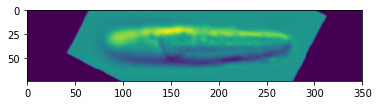

170.95 170.95 170.95 0.287486701037


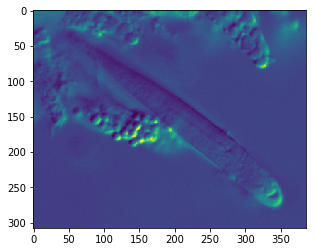

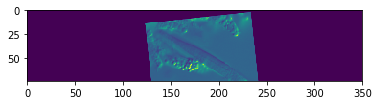

307.56 307.56 307.56 0.349253032138


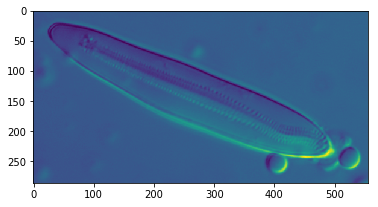

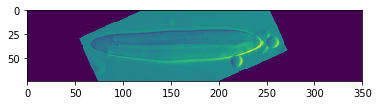

182.74 182.74 182.74 0.461698022351


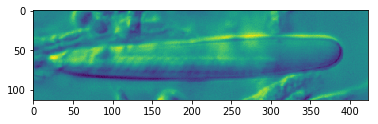

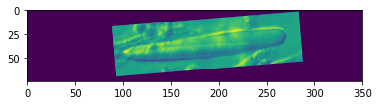

82.49 82.49 82.49 0.745164520755


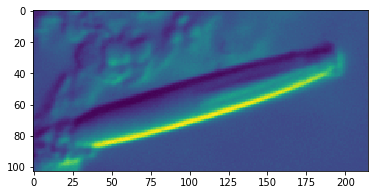

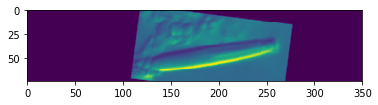

56.76 56.76 56.76 1.50433028739


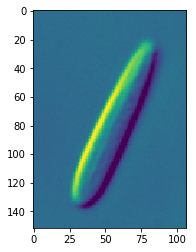

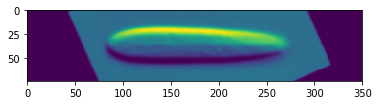

121.11 121.11 121.11 0.31685796271


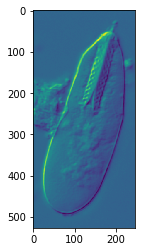

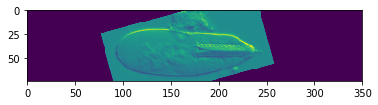

126.18 126.18 126.18 1.0745856678


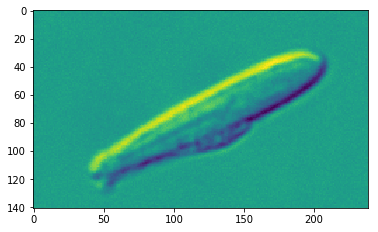

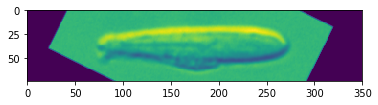

150.14 150.14 150.14 0.745170921841


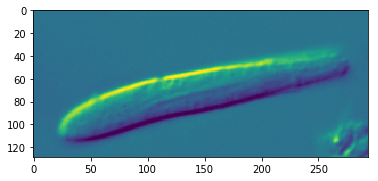

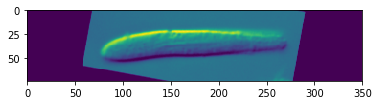

212.29 212.29 212.29 0.300845924365


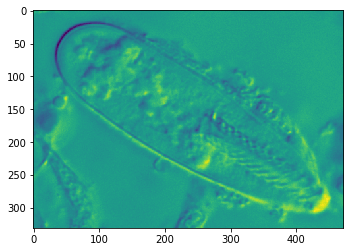

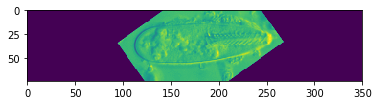

91.88 91.88 91.88 0.612698573358


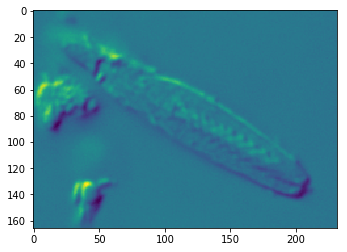

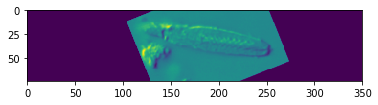

193.06 193.06 193.06 0.412643418679


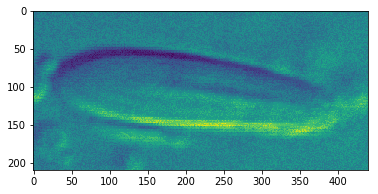

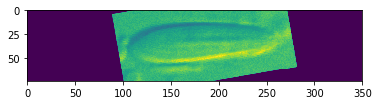

60.68 60.68 60.68 0.781567707329


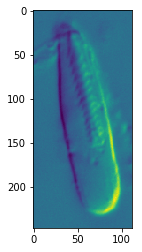

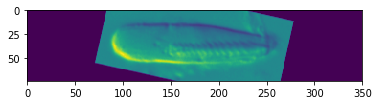

71.13 71.13 71.13 0.850113136344


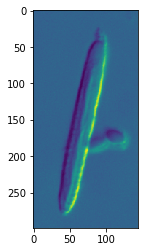

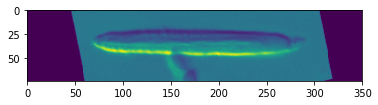

205.7 205.7 205.7 0.338560248912


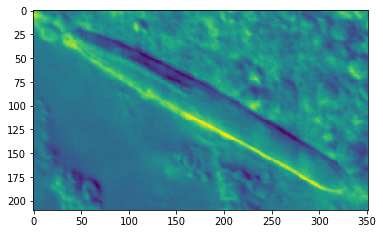

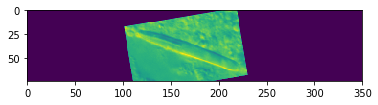

In [3]:

for filename in glob.glob("data/*"):
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    #image = normalize_brightness(image)
    center_x, center_y, scale, orientation  = elps.file2ellipse(filename)
    orientation = -(orientation)
    normalized = normalize_orientation(image, center_x, center_y, orientation, scale)
    print str(round(center_x,2)) +" "+  str(round(center_x,2)) +" "+ str( round(center_x,2)) +" "+ str( scale)
    # Render box
    color_image = cv2.imread(filename, cv2.IMREAD_COLOR)
    #result = cv2.drawContours(color_image, [np.int0(box)], 0, (0, 0, 255), 2)
    #result = cv2.drawContours(result, [np.int0(contour)], 0, (0, 255, 0), 1)
    plt.imshow(image)
    plt.show()
    plt.imshow(normalized)
    plt.show()
    #cv2.imshow('6', result)
    #cv2.waitKey()

